In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statistics import mean

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

In [56]:
#absolute path
path = '/content/drive/MyDrive/'
train = pd.read_csv (path + 'train.csv', index_col='HHX')
test = pd.read_csv(path + 'test.csv', index_col='HHX')

In [5]:
y_train = train.loc[:,'PHQCAT_A'].to_numpy()
y_test = test.loc[:,'PHQCAT_A'].to_numpy()
X_train = train.drop(['PHQCAT_A'], axis=1).to_numpy()
X_test = test.drop(['PHQCAT_A'], axis=1).to_numpy()

#First attempt: one vs. rest
This was the a first approach to the problem, and not the one that we ultimately decided to discuss. Here we're using logistic regression with L1 (Lasso) regularization. It's multiclass regression using the one-vs-rest method. We found this model to take significant time, often failed to converge, and was slightly less accurate than the multinomial model.

In [31]:
logreg = LogisticRegression(penalty = 'l1', class_weight='balanced', multi_class='ovr', solver='liblinear')
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [33]:
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring = 'roc_auc_ovr')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [34]:
print('Training ROC AUC:', mean(scores))
print('Testing Score:', roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr'))

Training ROC AUC: 0.64620083020101
Testing Score: 0.6520298727803765


In [35]:
print(metrics.classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.81      0.99      0.89      3947
           2       0.67      0.01      0.01       599
           3       0.00      0.00      0.00       180
           4       0.16      0.04      0.06       128

    accuracy                           0.81      4854
   macro avg       0.41      0.26      0.24      4854
weighted avg       0.75      0.81      0.73      4854



#Second attempt: multinomial

For this one, we used a multinomial distribution model for the model, and a different solver with Ridge Regression. We achieved similar results. Feature selection is probably the next step to improve this model.



In [36]:
logreg = LogisticRegression(penalty = 'l2', class_weight='balanced', multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [37]:
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring = 'roc_auc_ovr')
print('Training ROC AUC:', mean(scores))
print('Testing Score:', roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr'))

Training ROC AUC: 0.6021367660342931
Testing Score: 0.5987016161751642


In [38]:
print(metrics.classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.84      0.88      0.86      3947
           2       0.00      0.00      0.00       599
           3       0.04      0.07      0.05       180
           4       0.09      0.29      0.13       128

    accuracy                           0.72      4854
   macro avg       0.24      0.31      0.26      4854
weighted avg       0.69      0.72      0.70      4854



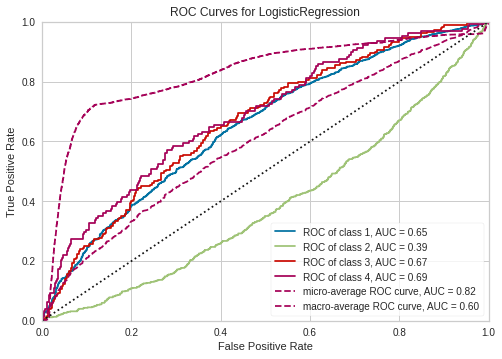

In [55]:
visualizer = ROCAUC(logreg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()